In [3]:
# libraries
import os
import json
import numpy as np
import pandas as pd
from extra_files import helper as hp
from imageio import imwrite, imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [4]:
# File paths
data_path = '/home/aldo/Documents/data-cic/'
preprocess_path = data_path + 'preprocess_data'

In [3]:
# Open label file
with open(data_path + 'via_region_data _final.json', 'r') as json_file:
    dict_json = json.load(json_file)
ground_truth_dict = hp.clean_dict(dict_json)

In [4]:
ground_truth_dict

{'image_72_0016.jpg': [{'shape_attributes': {'name': 'rect',
    'x': 1434,
    'y': 233,
    'width': 313,
    'height': 842},
   'region_attributes': {}}],
 'image_72_0013.jpg': [{'shape_attributes': {'name': 'rect',
    'x': 1237,
    'y': 258,
    'width': 296,
    'height': 744},
   'region_attributes': {}}],
 'image_72_0010.jpg': [{'shape_attributes': {'name': 'rect',
    'x': 1518,
    'y': 258,
    'width': 245,
    'height': 624},
   'region_attributes': {}}],
 'image_72_0005.jpg': [{'shape_attributes': {'name': 'rect',
    'x': 458,
    'y': 150,
    'width': 119,
    'height': 562},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'rect',
    'x': 226,
    'y': 209,
    'width': 238,
    'height': 565},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'rect',
    'x': 50,
    'y': 150,
    'width': 198,
    'height': 617},
   'region_attributes': {}},
  {'shape_attributes': {'name': 'rect',
    'x': 72,
    'y': 171,
    'width': 33,
    'height': 82}

### Convert label to a compatible format with the training module

In [4]:
label_pascal = []
label_pedestrian_cic = []
rescale = 300
path_images = data_path + '/images'

# Get images' names
keys = list(ground_truth_dict.keys())

# Iterate over all images' name
for name_img in keys:
    # Get bb from the image
    bb_list = hp.get_ground_truth(ground_truth_dict[name_img])
    
    for bb in bb_list:
        
        xmin = bb[0]
        ymin = bb[1]
        xmax = bb[0] + bb[2]
        ymax = bb[1] + bb[3]
    
        label_pascal.append([name_img, xmin, xmax, ymin, ymax, 15])
        label_pedestrian_cic.append([name_img, xmin, xmax, ymin, ymax, 1])

In [5]:
# Build dataframe
label_pascal = np.array(label_pascal)
label_pedestrian_cic = np.array(label_pedestrian_cic)
columns = ['frame', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id']
df_pascal = pd.DataFrame(label_pascal, columns=columns)
df_pedestrian_cic = pd.DataFrame(label_pedestrian_cic, columns=columns)

In [6]:
df_pascal.head(5)

,frame,xmin,xmax,ymin,ymax,class_id
0,image_72_0016.jpg,1434,1747,233,1075,15
1,image_72_0013.jpg,1237,1533,258,1002,15
2,image_72_0010.jpg,1518,1763,258,882,15
3,image_72_0005.jpg,458,577,150,712,15
4,image_72_0005.jpg,226,464,209,774,15


In [7]:
df_pedestrian_cic.head(5)

,frame,xmin,xmax,ymin,ymax,class_id
0,image_72_0016.jpg,1434,1747,233,1075,1
1,image_72_0013.jpg,1237,1533,258,1002,1
2,image_72_0010.jpg,1518,1763,258,882,1
3,image_72_0005.jpg,458,577,150,712,1
4,image_72_0005.jpg,226,464,209,774,1


In [8]:
# List of names for training and validation
train_list = os.listdir(preprocess_path + '/img_train')
val_list = os.listdir(preprocess_path + '/img_val')
test_list = os.listdir(preprocess_path + '/img_test')

In [9]:
df_pascal_train = df_pascal[df_pascal['frame'].isin(train_list)]
df_pascal_val = df_pascal[df_pascal['frame'].isin(val_list)]
df_cic_train = df_pedestrian_cic[df_pedestrian_cic['frame'].isin(train_list)]
df_cic_val = df_pedestrian_cic[df_pedestrian_cic['frame'].isin(val_list)]

In [10]:
df_cic_train.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,image_72_0016.jpg,1434,1747,233,1075,1
1,image_72_0013.jpg,1237,1533,258,1002,1
2,image_72_0010.jpg,1518,1763,258,882,1
11,image_70_0005.jpg,496,653,653,1028,1
12,image_70_0005.jpg,194,351,665,1045,1


In [11]:
df_cic_train.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,image_72_0016.jpg,1434,1747,233,1075,1
1,image_72_0013.jpg,1237,1533,258,1002,1
2,image_72_0010.jpg,1518,1763,258,882,1
11,image_70_0005.jpg,496,653,653,1028,1
12,image_70_0005.jpg,194,351,665,1045,1


In [12]:
# Save file as csv
df_pascal_train.to_csv(preprocess_path + '/cic_train_pascal.csv', index=False)
df_pascal_val.to_csv(preprocess_path + '/cic_pascal_val.csv', index=False)
df_cic_train.to_csv(preprocess_path + '/cic_train.csv', index=False)
df_cic_val.to_csv(preprocess_path + '/cic_val.csv', index=False)

## Udacity data set

In [55]:
path_udacity = '../data-cic/labels_trainval.csv'
df_udacity = pd.read_csv(path_udacity)
df_udacity.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [56]:
df_udacity_ped = df_udacity[df_udacity['class_id'] == 3]
df_udacity_ped['class_id'].values[:] = int(1)
df_udacity_ped.head()

,frame,xmin,xmax,ymin,ymax,class_id
1,1478019952686311006.jpg,437,454,120,186,1
63,1478019961680640592.jpg,264,271,139,155,1
69,1478019962181150666.jpg,268,275,138,156,1
76,1478019962681840550.jpg,271,280,137,156,1
82,1478019963181283434.jpg,278,287,138,158,1


In [57]:
df_udacity_ped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15540 entries, 1 to 165038
Data columns (total 6 columns):
frame       15540 non-null object
xmin        15540 non-null int64
xmax        15540 non-null int64
ymin        15540 non-null int64
ymax        15540 non-null int64
class_id    15540 non-null int64
dtypes: int64(5), object(1)
memory usage: 849.8+ KB


In [59]:
# save new label
df_udc_ped.to_csv('../data-cic/preprocess_data/udc.csv', index=False)

## Pascal Voc Dataset

In [1]:
from gluoncv import data, utils
from imageio import imwrite, imsave
import numpy as np
import pandas as pd

In [2]:
train_dataset = data.VOCDetection(splits=[(2007, 'trainval'), (2012, 'trainval')])
val_dataset = data.VOCDetection(splits=[(2007, 'test')])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

Num of training images: 16551
Num of validation images: 4952


In [3]:
pascalvoc = []
id_person = 14
# iterate over dataset
for number, data in enumerate(train_dataset):
    img, label = data
    
    # check if there is id person
    id_class = label[:, 4]
    if id_person in id_class:
        # name image
        img_name = 'train' + str(number) + '.jpg'
        # save image
        imsave( '../data-cic/pascal_dataset/' +  img_name, img.asnumpy())
        # iterate over bounding boxes
        for bb in label:
            if bb[4] == id_person:
                pascalvoc.append([img_name, int(bb[0]), int(bb[2]), int(bb[1]), int(bb[3]), 1])

In [4]:
df_pascal_train = pd.DataFrame(pascalvoc, columns=['image', 'xmin', 'xmax', 'ymin', 'ymax', 'id'])
df_pascal_train.to_csv('../data-cic/preprocess_data/pascal_train.csv', index=False)

In [5]:
pascalvoc = []
id_person = 14
# iterate over dataset
for number, data in enumerate(val_dataset):
    img, label = data
    
    # check if there is id person
    id_class = label[:, 4]
    if id_person in id_class:
        # name image
        img_name = 'val' + str(number) + '.jpg'
        # save image
        imsave( '../data-cic/pascal_dataset/' +  img_name, img.asnumpy())
        # iterate over bounding boxes
        for bb in label:
            if bb[4] == id_person:
                pascalvoc.append([img_name, int(bb[0]), int(bb[2]), int(bb[1]), int(bb[3]), 1])

In [6]:
df_pascal_val = pd.DataFrame(pascalvoc, columns=['image', 'xmin', 'xmax', 'ymin', 'ymax', 'id'])
df_pascal_val.to_csv('../data-cic/preprocess_data/pascal_val.csv', index=False)

## Training SSD300 trained with 07+12+COCO

In [14]:
# File paths
data_path = '/home/aldo/Documents/data-cic/'
preprocess_path = data_path + 'preprocess_data'

In [4]:
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TerminateOnNaN, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras import backend as K
from keras.models import load_model
from math import ceil
import numpy as np
import extra_files.helper as hp
from matplotlib import pyplot as plt

from models.keras_ssd300 import ssd_300
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast
from keras_layers.keras_layer_L2Normalization import L2Normalization

from ssd_encoder_decoder.ssd_input_encoder import SSDInputEncoder
from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_geometric_ops import Resize
from data_generator.object_detection_2d_photometric_ops import ConvertTo3Channels
from data_generator.data_augmentation_chain_original_ssd import SSDDataAugmentation
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms

### Parameters (original SSD300 architecture)

In [10]:
## Parameteres needed for ssd_300() and SSDInputEncoder()

img_height = 300 # Height of the model input images
img_width = 300 # Width of the model input images
img_channels = 3 # Number of color channels of the model input images
mean_color = [123, 117, 104] # The per-channel mean of the images in the dataset. Do not change this value if you're using any of the pre-trained weights.
swap_channels = [2, 1, 0] # The color channel order in the original SSD is BGR, so we'll have the model reverse the color channel order of the input images.
n_classes = 20 # Number of positive classes, e.g. 20 for Pascal VOC, 80 for MS COCO
# scales_pascal = [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05] # The anchor box scaling factors used in the original SSD300 for the Pascal VOC datasets
scales_coco = [0.07, 0.15, 0.33, 0.51, 0.69, 0.87, 1.05] # The anchor box scaling factors used in the original SSD300 for the MS COCO datasets
scales = scales_coco
aspect_ratios = [[1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5]] # The anchor box aspect ratios used in the original SSD300; the order matters
two_boxes_for_ar1 = True
steps = [8, 16, 32, 64, 100, 300] # The space between two adjacent anchor box center points for each predictor layer.
offsets = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # The offsets of the first anchor box center points from the top and left borders of the image as a fraction of the step size for each predictor layer.
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [0.1, 0.1, 0.2, 0.2] # The variances by which the encoded target coordinates are divided as in the original implementation
normalize_coords = True

## Create new model with SSD weights

In [11]:
# 1: Build the Keras model.

K.clear_session() # Clear previous models from memory.

model = ssd_300(image_size=(img_height, img_width, img_channels),
                n_classes=n_classes,
                mode='training',
                l2_regularization=0.0005,
                scales=scales,
                aspect_ratios_per_layer=aspect_ratios,
                two_boxes_for_ar1=two_boxes_for_ar1,
                steps=steps,
                offsets=offsets,
                clip_boxes=clip_boxes,
                variances=variances,
                normalize_coords=normalize_coords,
                subtract_mean=mean_color,
                swap_channels=swap_channels)

# 2: Load some weights into the model.

# TODO: Set the path to the weights you want to load.
weights_path = '../weights/pascal_voc/pascal_voc_07_12_coco_300x300.h5'

model.load_weights(weights_path, by_name=True)

# 3: Instantiate an optimizer and the SSD loss function and compile the model.
#    If you want to follow the original Caffe implementation, use the preset SGD
#    optimizer, otherwise I'd recommend the commented-out Adam optimizer.

# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.003, momentum=0.9, decay=0.0, nesterov=False)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=sgd, loss=ssd_loss.compute_loss)

## Data generator for the training

In [15]:
# 1: Instantiate two `DataGenerator` objects: One for training, one for validation.

# Optional: If you have enough memory, consider loading the images into memory for the reasons explained above.

train_dataset = DataGenerator(load_images_into_memory=True, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=True, hdf5_dataset_path=None)

# 2: Parse the image and label lists for the training and validation datasets.

# TODO: Set the paths to your dataset here.

# Images
images_dir = data_path + '/images'

# Ground truth
train_labels_filename = preprocess_path + '/cic_train_20_classes.csv'
val_labels_filename   = preprocess_path + '/cic_val_20_classes.csv'

train_dataset.parse_csv(images_dir=images_dir,
                        labels_filename=train_labels_filename,
                        input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'], # This is the order of the first six columns in the CSV file that contains the labels for your dataset. If your labels are in XML format, maybe the XML parser will be helpful, check the documentation.
                        include_classes='all')

val_dataset.parse_csv(images_dir=images_dir,
                      labels_filename=val_labels_filename,
                      input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                      include_classes='all')

# Optional: Convert the dataset into an HDF5 dataset. This will require more disk space, but will
# speed up the training. Doing this is not relevant in case you activated the `load_images_into_memory`
# option in the constructor, because in that cas the images are in memory already anyway. If you don't
# want to create HDF5 datasets, comment out the subsequent two function calls.

# train_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_train.h5',
#                                   resize=False,
#                                   variable_image_size=True,
#                                   verbose=True)

# val_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_val.h5',
#                                 resize=False,
#                                 variable_image_size=True,
#                                 verbose=True)

# Get the number of samples in the training and validations datasets.
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Loading images into memory: 100%|██████████| 45/45 [00:01<00:00, 27.90it/s]
Number of images in the training dataset:	   210
Number of images in the validation dataset:	    45


In [18]:
# 3: Set the batch size.
batch_size = 16 # Change the batch size if you like, or if you run into GPU memory issues.

# 4: Set the image transformations for pre-processing and data augmentation options.
# For the training generator:
ssd_data_augmentation = SSDDataAugmentation(img_height=img_height,
                                            img_width=img_width,
                                            background=mean_color)

# For the validation generator:
convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)

# 5: Instantiate an encoder that can encode ground truth labels into the format needed by the SSD loss function.
# The encoder constructor needs the spatial dimensions of the model's predictor layers to create the anchor boxes.
predictor_sizes = [model.get_layer('conv4_3_norm_mbox_conf').output_shape[1:3],
                   model.get_layer('fc7_mbox_conf').output_shape[1:3],
                   model.get_layer('conv6_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv7_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv8_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv9_2_mbox_conf').output_shape[1:3]]

ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_per_layer=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.5,
                                    normalize_coords=normalize_coords)

# 6: Create the generator handles that will be passed to Keras' `fit_generator()` function.
train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[ssd_data_augmentation],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)

val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[convert_to_3_channels,
                                                      resize],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)

# Get the number of samples in the training and validations datasets.
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Number of images in the training dataset:	   210
Number of images in the validation dataset:	    45


## Remaining training parameters

In [20]:
# Define model callbacks.

# TODO: Set the filepath under which you want to save the model.
model_checkpoint = ModelCheckpoint(filepath='/home/aldo/Documents/weights/models/ssd300_sgd/ssd300_fine_tunning_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
#model_checkpoint.best = 

csv_logger = CSVLogger(filename=data_path + 'history/ssd300_sgd_pascal_20_classes_tunning/ssd300_fine_tunning.csv',
                       separator=',',
                       append=True)

# learning_rate_scheduler = LearningRateScheduler(schedule=lr_schedule_adam,
#                                                 verbose=1)

# terminate_on_nan = TerminateOnNaN()

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=12,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.5,
                                         patience=10,
                                         verbose=1,
                                         min_delta=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate]

In [21]:
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 500
steps_per_epoch = 30

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)

Epoch 1/500
30/30 [==============================] - 69s 2s/step - loss: 5.2833 - val_loss: 7.7250

Epoch 00001: val_loss improved from inf to 7.72497, saving model to /home/aldo/Documents/weights/models/ssd300_sgd/ssd300_fine_tunning_epoch-01_loss-5.1570_val_loss-7.7250.h5
Epoch 2/500
30/30 [==============================] - 67s 2s/step - loss: 8.8754 - val_loss: 9.9458

Epoch 00002: val_loss did not improve from 7.72497
Epoch 3/500
30/30 [==============================] - 66s 2s/step - loss: 8.3948 - val_loss: 9.4718

Epoch 00003: val_loss did not improve from 7.72497
Epoch 4/500
30/30 [==============================] - 64s 2s/step - loss: 6.5253 - val_loss: 5.3626

Epoch 00004: val_loss improved from 7.72497 to 5.36256, saving model to /home/aldo/Documents/weights/models/ssd300_sgd/ssd300_fine_tunning_epoch-04_loss-6.4989_val_loss-5.3626.h5
Epoch 5/500
30/30 [==============================] - 65s 2s/step - loss: 5.5521 - val_loss: 5.5595

Epoch 00005: val_loss did not improve from 5

30/30 [==============================] - 62s 2s/step - loss: 3.0912 - val_loss: 3.5994

Epoch 00041: val_loss did not improve from 3.32231
Epoch 42/500
30/30 [==============================] - 64s 2s/step - loss: 3.1151 - val_loss: 3.5058

Epoch 00042: val_loss did not improve from 3.32231
Epoch 43/500
30/30 [==============================] - 66s 2s/step - loss: 3.4750 - val_loss: 3.5194

Epoch 00043: val_loss did not improve from 3.32231
Epoch 44/500
30/30 [==============================] - 66s 2s/step - loss: 3.1003 - val_loss: 3.4427

Epoch 00044: val_loss did not improve from 3.32231
Epoch 45/500
30/30 [==============================] - 65s 2s/step - loss: 3.0835 - val_loss: 3.4490

Epoch 00045: val_loss did not improve from 3.32231
Epoch 46/500
30/30 [==============================] - 69s 2s/step - loss: 2.9878 - val_loss: 3.6101

Epoch 00046: val_loss did not improve from 3.32231
Epoch 47/500
30/30 [==============================] - 66s 2s/step - loss: 2.8803 - val_loss: 3.4149



30/30 [==============================] - 63s 2s/step - loss: 2.6148 - val_loss: 3.1383

Epoch 00088: val_loss did not improve from 3.08296
Epoch 89/500
30/30 [==============================] - 64s 2s/step - loss: 2.6049 - val_loss: 3.0580

Epoch 00089: val_loss improved from 3.08296 to 3.05799, saving model to /home/aldo/Documents/weights/models/ssd300_sgd/ssd300_fine_tunning_epoch-89_loss-2.6171_val_loss-3.0580.h5
Epoch 90/500
30/30 [==============================] - 65s 2s/step - loss: 2.5240 - val_loss: 3.0930

Epoch 00090: val_loss did not improve from 3.05799
Epoch 91/500
30/30 [==============================] - 60s 2s/step - loss: 2.6659 - val_loss: 3.0786

Epoch 00091: val_loss did not improve from 3.05799
Epoch 92/500
30/30 [==============================] - 66s 2s/step - loss: 2.5244 - val_loss: 3.1471

Epoch 00092: val_loss did not improve from 3.05799
Epoch 93/500
30/30 [==============================] - 67s 2s/step - loss: 2.5767 - val_loss: 3.0965

Epoch 00093: val_loss di

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(data_path + 'history/ssd300_sgd_pascal_20_classes_tunning/ssd300_fine_tunning.csv')

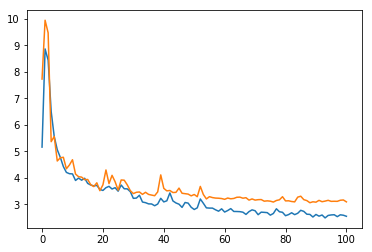

In [26]:
plt.plot(df['epoch'], df['loss'])
plt.plot(df['epoch'], df['val_loss'])